<h1>Imports</h1>

In [ ]:
import os 
import cv2
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras import layers


2025-08-14 23:33:24.332207: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h1>Import Dataset</h1>

In [6]:
mnist = tf.keras.datasets.mnist
(x_train , y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

<h1>Model Initalisation + Saving</h1>

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(28, 28), name="inputs"),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train.astype('float32'), y_train.astype('int32'), epochs=3)

model.save("numerical.keras")

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9217 - loss: 0.2641
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9676 - loss: 0.1055
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0723


In [8]:
model = tf.keras.models.load_model('numerical.keras')

loss, accuracy = model.evaluate(x_train, y_train)
print(f"Accuracy:{accuracy}")
print(f"Loss: {loss}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0485
Accuracy:0.9849500060081482
Loss: 0.04846138507127762


<h1>Sample Testing</h1>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


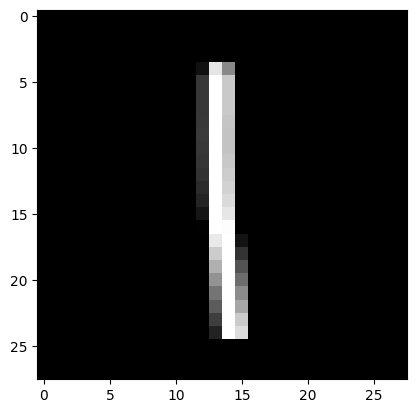

result: 1


In [9]:
img = cv2.imread("./samples/one.png", cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (28, 28))
img = 255 - img  
img = np.expand_dims(img, axis=0)  

pred = model.predict(img)

plt.imshow(img[0], cmap="gray")
plt.show()
print(f"result: {np.argmax(pred)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


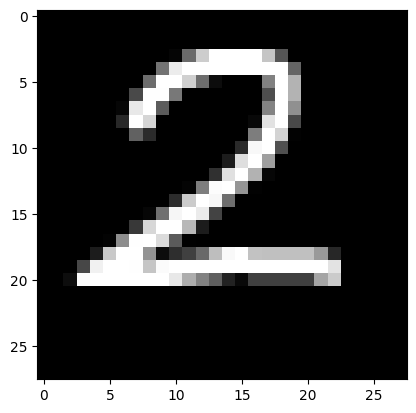

result: 2


In [15]:
img = cv2.imread("./samples/two.png", cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (28, 28))
img = 255 - img  
img = np.expand_dims(img, axis=0)  

pred = model.predict(img)

plt.imshow(img[0], cmap="gray")
plt.show()
print(f"result: {np.argmax(pred)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


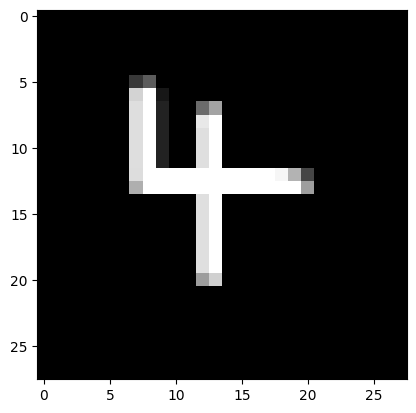

result: 8


In [17]:
img = cv2.imread("./samples/four(1).png", cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (28, 28))
img = 255 - img  
img = np.expand_dims(img, axis=0)  

pred = model.predict(img)

plt.imshow(img[0], cmap="gray")
plt.show()
print(f"result: {np.argmax(pred)}")